In [2]:
api_key = ''
url = 'https://data.edd.ca.gov/resource/e6gw-gvii.json?'
county_list = ['Alameda','Alpine','Amador','Butte','Calaveras','Colusa','Contra Costa','Del Norte','El Dorado','Fresno','Glenn','Humboldt','Imperial',
               'Inyo','Kern','Kings','Lake','Lassen','Los Angeles','Madera','Marin','Mariposa','Mendocino','Merced','Modoc','Mono','Monterey','Napa',
               'Nevada','Orange','Placer','Plumas','Riverside','Sacramento','San Benito','San Bernardino','San Diego','San Francisco','San Joaquin',
               'San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Shasta','Sierra','Siskiyou','Solano','Sonoma','Stanislaus',
               'Sutter','Tehama','Trinity','Tulare','Tuolumne','Ventura','Yolo','Yuba']


In [3]:
import json
import requests


In [4]:
import pandas as pd
df = pd.DataFrame(columns = ['Year','County','Unemployment Rate'])
query_url = url + '$$app_token=' + api_key
x = 2009
while x < 2019:
    y = 0
    while y < 58:
        tjson = requests.get(query_url + '&area_name=' + county_list[y] + ' County' + '&year=' + str(x)).json()
        templist = [float(each['unemployment_rate']) for each in tjson]
        if county_list[y] == 'Los Angeles County':
            z = 100 * (sum(templist)/24)
        else:
            z = 100 * (sum(templist)/12)
        df.loc[len(df)] = [x,county_list[y],z]
        y = y + 1
    x = x + 1 

    



In [6]:
df.to_csv("cleaned_unemployment_data.csv")

In [7]:
df.tail()

,Year,County,Unemployment Rate
575,2018,Tulare,18.416667
576,2018,Tuolumne,8.858333
577,2018,Ventura,7.225000
578,2018,Yolo,8.416667
579,2018,Yuba,12.850000


In [8]:
unemployment_df = pd.read_csv('cleaned_unemployment_data.csv')
house_df = pd.read_csv('county_data.csv')

In [9]:
unemployment_df.head()

,Unnamed: 0,Year,County,Unemployment Rate,Region
0,0,2009,Alameda,10.258333,"Alameda County, CA"
1,1,2009,Alpine,14.725000,"Alpine County, CA"
2,2,2009,Amador,11.425000,"Amador County, CA"
3,3,2009,Butte,12.283333,"Butte County, CA"
4,4,2009,Calaveras,13.600000,"Calaveras County, CA"


In [10]:
final_df =  pd.merge(unemployment_df, house_df, on=['Region','Year'], how='inner')

In [11]:
final_df.head()

,Unnamed: 0_x,Year,County,Unemployment Rate,Region,Unnamed: 0_y,State,Region Type,City,Property Type,Period Begin,Median Sale Price
0,174,2012,Alameda,8.7,"Alameda County, CA",686,California,County,NaN,All Residential,2/1/2012,312000
1,174,2012,Alameda,8.7,"Alameda County, CA",1372,California,County,NaN,All Residential,6/1/2012,389000
2,174,2012,Alameda,8.7,"Alameda County, CA",1715,California,County,NaN,All Residential,3/1/2012,330000
3,174,2012,Alameda,8.7,"Alameda County, CA",1716,California,County,NaN,All Residential,4/1/2012,350000
4,174,2012,Alameda,8.7,"Alameda County, CA",3139,California,County,NaN,All Residential,9/1/2012,412000


In [31]:
house_df = pd.read_csv('5_county_data.csv')

In [32]:
final_df =  pd.merge(unemployment_df, house_df, on=['Region','Year'], how='inner')

In [33]:
final_df.head()

,Unnamed: 0_x,Year,County_x,Unemployment Rate,Region,Unnamed: 0_y,State,County_y,City,Median Sale Price,Date,Month
0,174,2012,Alameda,8.7,"Alameda County, CA",125,California,"Alameda, CA",Alameda,488000,9/1/2012,9
1,174,2012,Alameda,8.7,"Alameda County, CA",714,California,"Alameda, CA",Alameda,518000,6/1/2012,6
2,174,2012,Alameda,8.7,"Alameda County, CA",1054,California,"Alameda, CA",Alameda,402000,2/1/2012,2
3,174,2012,Alameda,8.7,"Alameda County, CA",1058,California,"Alameda, CA",Alameda,439000,3/1/2012,3
4,174,2012,Alameda,8.7,"Alameda County, CA",1765,California,"Alameda, CA",Alameda,503000,5/1/2012,5


In [34]:
final_df.tail()

,Unnamed: 0_x,Year,County_x,Unemployment Rate,Region,Unnamed: 0_y,State,County_y,City,Median Sale Price,Date,Month
410,564,2018,Santa Clara,5.2,"Santa Clara County, CA",19527,California,"Santa Clara, CA",Santa Clara,1420000,6/1/2018,6
411,564,2018,Santa Clara,5.2,"Santa Clara County, CA",21180,California,"Santa Clara, CA",Santa Clara,1450000,4/1/2018,4
412,564,2018,Santa Clara,5.2,"Santa Clara County, CA",21204,California,"Santa Clara, CA",Santa Clara,1351000,7/1/2018,7
413,564,2018,Santa Clara,5.2,"Santa Clara County, CA",23082,California,"Santa Clara, CA",Santa Clara,1319000,8/1/2018,8
414,564,2018,Santa Clara,5.2,"Santa Clara County, CA",25629,California,"Santa Clara, CA",Santa Clara,1193000,12/1/2018,12


In [49]:
plot_df = final_df.groupby(['Region','Year']).mean()

In [50]:
plot_df.head()

Unnamed: 0_x  Unemployment Rate  Unnamed: 0_y  \
Region             Year                                                  
Alameda County, CA 2012         174.0           8.700000   2461.000000   
                   2013         232.0           7.225000   2669.416667   
                   2014         290.0           5.800000   3333.583333   
                   2015         348.0           4.741667   5284.250000   
                   2016         406.0           4.291667  11663.916667   

                         Median Sale Price  Month  
Region             Year                            
Alameda County, CA 2012      498727.272727    7.0  
                   2013      595750.000000    6.5  
                   2014      700416.666667    6.5  
                   2015      786000.000000    6.5  
                   2016      844000.000000    6.5

In [51]:
plot_df.tail()

Unnamed: 0_x  Unemployment Rate  Unnamed: 0_y  \
Region                 Year                                                  
Santa Clara County, CA 2014         332.0           5.150000   4739.500000   
                       2015         390.0           4.133333   6430.833333   
                       2016         448.0           3.766667  12822.166667   
                       2017         506.0           3.216667  12120.666667   
                       2018         564.0           5.200000  16506.833333   

                             Median Sale Price  Month  
Region                 Year                            
Santa Clara County, CA 2014       7.560000e+05    6.5  
                       2015       8.764167e+05    6.5  
                       2016       9.552500e+05    6.5  
                       2017       1.113667e+06    6.5  
                       2018       1.339583e+06    6.5

In [52]:
plot_df.to_csv('final_merged_data.csv')

<function matplotlib.pyplot.show(*args, **kw)>

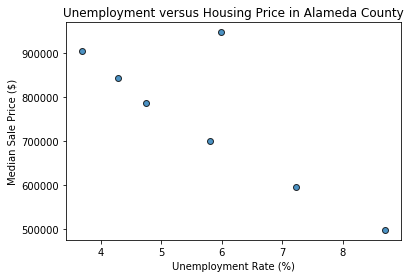

In [60]:
%matplotlib inline
x = plot_df.iloc[0:7,1]
y = plot_df.iloc[0:7,3]
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o", cmap='viridis', alpha=0.8)
plt.title("Unemployment versus Housing Price in Alameda County")
plt.ylabel("Median Sale Price ($)")
plt.xlabel("Unemployment Rate (%)")
plt.savefig("AlamedaGraph.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

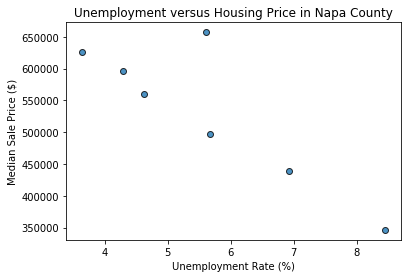

In [63]:
x = plot_df.iloc[7:14,1]
y = plot_df.iloc[7:14,3]
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o", cmap='plasma', alpha=0.8)
plt.title("Unemployment versus Housing Price in Napa County")
plt.ylabel("Median Sale Price ($)")
plt.xlabel("Unemployment Rate (%)")
plt.savefig("NapaGraph.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

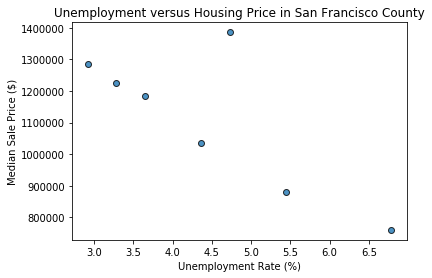

In [64]:
x = plot_df.iloc[14:21,1]
y = plot_df.iloc[14:21,3]
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o", cmap='magma', alpha=0.8)
plt.title("Unemployment versus Housing Price in San Francisco County")
plt.ylabel("Median Sale Price ($)")
plt.xlabel("Unemployment Rate (%)")
plt.savefig("SanFranciscoGraph.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

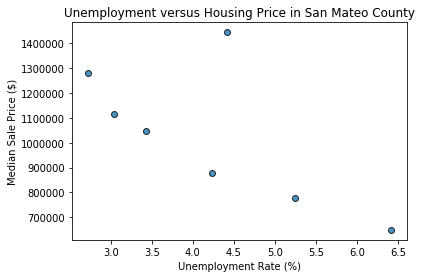

In [65]:
x = plot_df.iloc[21:28,1]
y = plot_df.iloc[21:28,3]
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o", cmap='viridis', alpha=0.8)
plt.title("Unemployment versus Housing Price in San Mateo County")
plt.ylabel("Median Sale Price ($)")
plt.xlabel("Unemployment Rate (%)")
plt.savefig("SanMateoGraph.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

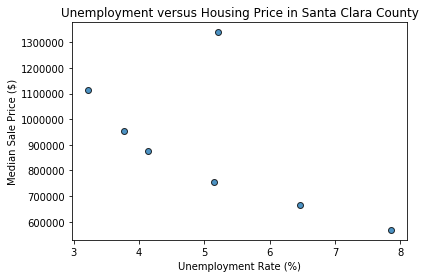

In [66]:
x = plot_df.iloc[28:35,1]
y = plot_df.iloc[28:35,3]
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o", cmap='viridis', alpha=0.8)
plt.title("Unemployment versus Housing Price in Santa Clara County")
plt.ylabel("Median Sale Price ($)")
plt.xlabel("Unemployment Rate (%)")
plt.savefig("SantaClaraGraph.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

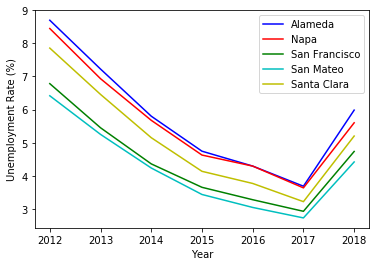

In [71]:
x = ['2012','2013','2014','2015','2016','2017','2018']
plt.plot(x, plot_df.iloc[0:7,1], 'b-', label = 'Alameda')
plt.plot(x, plot_df.iloc[7:14,1], 'r-', label = 'Napa')
plt.plot(x, plot_df.iloc[14:21,1], 'g-', label = 'San Francisco')
plt.plot(x, plot_df.iloc[21:28,1], 'c-', label = 'San Mateo')
plt.plot(x, plot_df.iloc[28:35,1], 'y-', label = 'Santa Clara')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.savefig('AllCountiesGraph.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

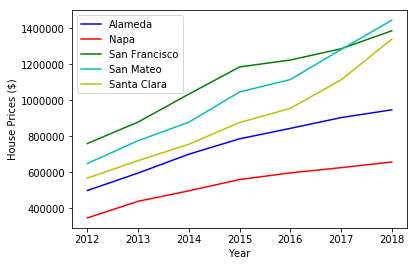

In [72]:
x = ['2012','2013','2014','2015','2016','2017','2018']
plt.plot(x, plot_df.iloc[0:7,3], 'b-', label = 'Alameda')
plt.plot(x, plot_df.iloc[7:14,3], 'r-', label = 'Napa')
plt.plot(x, plot_df.iloc[14:21,3], 'g-', label = 'San Francisco')
plt.plot(x, plot_df.iloc[21:28,3], 'c-', label = 'San Mateo')
plt.plot(x, plot_df.iloc[28:35,3], 'y-', label = 'Santa Clara')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('House Prices ($)')
plt.savefig('AllCountiesGraph2.png')
plt.show